# Etude de la structure de bande du matériau DyCuSe2 

In [340]:
from numpy import *
from matplotlib import pyplot as plt
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter

## Téléchargement de la struture de bandes

In [341]:
with MPRester("GZeryMtA91usB78Q") as m:
    band = m.get_bandstructure_by_material_id("mp-675349") 
    plotter = BSPlotter(band)
    data = plotter.bs_plot_data()

## Bande interdite

La bande interdite est une bande entre la dernière bande de valence et la première bande de conduction où la densité d'état est nulle, c'est à dire que l'on ne peut pas trouver d'électron dans cette zone. Cette bande interdite se situe donc entre le sommet de la bande de valence et la base de la bande de conduction. En effet ces deux points étant les dernier et premiers occuper ils sont donc forcément sur la dernière bande de valence et la première bande de conduction. Cette bande n'est pas présente dans les conducteurs où la bande de conduction et de valence se chevauchent. 

L'objet BandStructure de pymatgen possède la fonction get_band_gap qui permet d'obtenir plusieur informations sur le gap interdit.

In [342]:
gap = band.get_band_gap()
print("La fonction nous donne un valeur pour 'direct': ",gap['direct'])
print("Nous avons donc un gap indirect, le vecteur de transition de ce gap est:",gap['transition'])
print("Ce gap indirect a une énergie  de ", gap['energy'],"l'énergie étant de l'ordre d'1 eV nous avons affaire à un semiconducteur" )

La fonction nous donne un valeur pour 'direct':  False
Nous avons donc un gap indirect, le vecteur de transition de ce gap est: \Gamma-L
Ce gap indirect a une énergie  de  1.0635 l'énergie étant de l'ordre d'1 eV nous avons affaire à un semiconducteur


La présence d'un gap indirect implique qu'il est plus compliqué de passer ce gap. En effet un gap indirect implique un changement du vecteur d'onde en plus d'une modification de l'énergie. Le simple échange de photon n'est donc plus suffisant pour passer le gap et une interaction supplémentaire avec un phonon est recquise. 

## Dispersion de la pemière bande de conduction et de la dernière bande de valence

La relation de dispertion lie l'énergie au vecteur d'onde, plus l'énergie varie avec le vecteur d'onde plus une zone de bande est dite dispersive. On va donc regarder la pente de la bande, plus la valeur absolue de la pente sera importante plus la bande sera dispersive.

Afin d'obtenir les pentes on utlilise la formule dy/dx sur chaque intervalle de la dernière bande de valence et la première bande de conduction. Pour cela on utilise la variable data qui contient toutes les données des bandes de structure. On commence donc par calculer la distance dans chaque direction, pour cela on utilsie la donnée data, 'ticks' et le tableau 'distance'. Ensuite pour calculer la différence d'énergie il faut chercher un peu plus dans data, dans celle ci se trouve une catégorie 'energy', qui représente l'energie le long du chemin dans la zone de Brillouin pour chaque bande de structure. On remarque aussi que chacune des bandes est indexée, étant donnée que l'on ne s'intéresse pas à toutes les bandes mais uniquement à la dernière de valence et la première de conduction, on va chercher l'index de ces bandes avec  les fonctions 'get_vbm()' et 'get_cbm()' de l'objet BandStructure de pymatgen. Ces fonctions donnent le sommet de la bande de la dernière bande de valence et la base de la première bande de conduction. Cette fonction nous donne les index 18 et 19.  

In [343]:
#création d'un nouveau tableau de distances, sans répétition
distance = data['ticks']['distance']
dist = zeros([int(len(distance)/2)+1])
for i in range(dist.size):
    dist[i] = distance[2*i-1]
    if i == 0:
        dist[i] = distance[0]
# en utilisan les fonctions 
# get_vbm()
# get_cbm()
# on trouve comme index 18 et 19, on va donc cherhcer pour chaque point la pente avec une boucle for en gardant le min et le max à chaque fois
#dans 'energy' le "1" indique que l'on veut l'énergie, le premier [] indique quel intevervalle on regarde et le dernier [] sur quel bande de valence, ici il sera fixé à 18 et 19 et enfin le dernier représente l'endroit sur l'intervalle, ici on prend les extrêmes donc les indices 0 et -1
maxval = 0
minval = 100
maxcond = 0
mincond = 100
xminvd = 0
xminva = 0
yminvd = 0
yminva = 0
xmaxvd = 0
xmaxva = 0
ymaxvd = 0
ymaxva = 0
xmincd = 0
xminca = 0
ymincd = 0
yminca = 0
xmaxcd = 0
xmaxca = 0
ymaxcd = 0
ymaxca = 0
#on va stocker les coordonnées des points de départ et d'arrivée de chaque pente intéresante dans la donnée zmotab ou z est le type de coordonnée (abs/ord),mot si c'est la pente max ou min, a le lettre de bande (v pour valence et c pour conduction) et b la lettre de départ(d) ou d'arrivée(a)
for i in range(dist.size - 1):
    val0 = data['energy']["1"][i][18][0]
    val1 = data['energy']["1"][i][18][-1]
    cond0 = data['energy']["1"][i][19][0]
    cond1 = data['energy']["1"][i][19][-1]
    dx = dist[i+1] - dist[i]
    vpente = abs((val1-val0))/dx
    cpente = abs((cond1-cond0))/dx
    if vpente < minval:
        minval = vpente
        xminvd = dist[i]
        xminva = dist[i+1]
        yminvd = val0
        yminva = val1
    if vpente > maxval:
        maxval = vpente
        xmaxvd =  dist[i]
        xmaxva = dist[i+1]
        ymaxvd = val0
        ymaxva = val1
    if cpente < mincond:
        mincond = cpente
        xmincd = dist[i]
        xminca = dist[i+1]
        ymincd = cond0
        yminca = cond1
    if cpente > maxcond:
        maxcond = cpente
        xmaxcd =  dist[i]
        xmaxca = dist[i+1]
        ymaxcd = cond0
        ymaxca = cond1
print("La pente la plus forte de la bande de valence est : ",maxval)
print("La pente la plus faible de la bande de valence est : ",minval)
print("La pente la plus forte de la bande de conduction est : ",maxcond)
print("La pente la plus faible de la bande de conduction est : ",mincond)

La pente la plus forte de la bande de valence est :  1.5614823236878677
La pente la plus faible de la bande de valence est :  0.1420675131128164
La pente la plus forte de la bande de conduction est :  2.9149279274497433
La pente la plus faible de la bande de conduction est :  0.02293473060622584


Une fois ces valeurs obtenues on peut afficher les pentes dans le graphique. On va utilsier le code couleur suivant; vert pour une pente maximale et rouge pour une pente minimale. Si la flèche se retrouve en dessous du gap elle est sur la dernière bande de valence, si elle est au dessus elle est sur la première bande de conduction. Sur le graphe ci-dessous on peut voir que pour la bande valence la pente la plus forte se trouve entre $\Gamma$ et M, et sa pente la plus faible est entre M et K. Pour la bande de conduction la pente la plus faible se trouve entre $\Gamma$ et M et la plus forte entre M et K

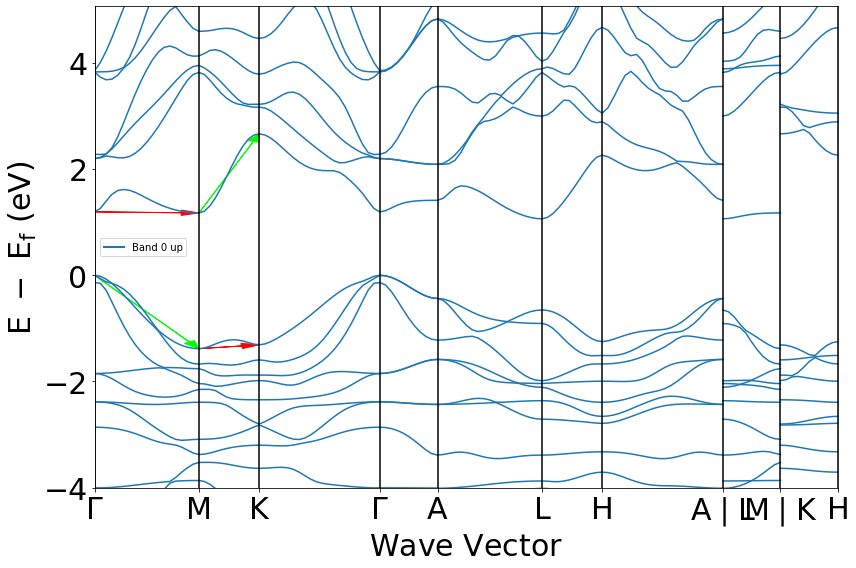

In [344]:
plotter.get_plot()
#ajouter les flèches pour la bande de valence
plt.arrow(xminvd,yminvd,xminva-xminvd,yminva-yminvd,length_includes_head=True,head_width=0.1,color=(1,0,0,1))
plt.arrow(xmaxvd,ymaxvd,xmaxva-xmaxvd,ymaxva-ymaxvd,length_includes_head=True,head_width=0.1,color=(0,1,0,1))

#ajouter les flèches pour la bande de conduction
plt.arrow(xmincd,ymincd,xminca-xmincd,yminca-ymincd,length_includes_head=True,head_width=0.1,color=(1,0,0,1))
plt.arrow(xmaxcd,ymaxcd,xmaxca-xmaxcd,ymaxca-ymaxcd,length_includes_head=True,head_width=0.1,color=(0,1,0,1))
display()

## Masse effective

Pour exprimer l'énergie on utilise un modèle de dispersion parabolique tel que $ E = \frac{1}{2} k^2$ en unités atomique, que l'on peut remttre en unités du Système internationale comme $ E = \frac{\hbar}{2 m_e} k^2 $ où $m_e$ est la masse de l'électron, qui lie l'énergie au vecteur d'onde k. Cependant on observe dans la réalite un comportement différent de celui que l'on devait avoir pour la masse de l'électron, on peut voir que toutes les bandes n'ont pas la même forme sur le graphe. On peut donc penser qu'il y a un paramètre qui dépend de l'endroit où l'on se trouve qui va modifier le comportement d'une particule libre, on va alors parler de masse effective.

La masse effective est une masse théorique qui représente la difficulté qu'a une particule libre à se déplacer dans la bande. En effet plus le déplacement est difficile plus la particule libre est lente, c'est donc comme si une même énergie était donc appliquée à une mollécule plus lourde. La masse effective est définie comme $ {m_{ij}}^* =  \frac{\hbar}{\frac{\delta E}{\delta k_i \delta k_j}}$.

On cherche donc à connaître les masses effectives aux extremas des bandes, on va alors approximer l'énergie par des paraboles autour des extremas. On va donc obtenir une équation de la forme $ a x^2 + b x + c $ et la masse effective sera alors égale à $ \frac{\hbar}{2a}$

In [345]:
#on cherche d'abord à obtenir les coordonnées du sommet de la bande de valence et de la base de la bande de conduction
sommety = -10
sommetx = 0
basey = 10
basex = 0
for i in range(dist.size):
    yv =  data['energy']["1"][i][18][0]
    yc =  data['energy']["1"][i][19][0]
    if yv > sommety and i != 0.0:
        sommety = yv
        sommetx = dist[i]
        indicev = i
    if yc < basey :
        basey = yc
        basex = dist[i]
        indicec = i
print("On obtient comme coordonnées pour les sommets : (Gamma, 0.0)")
print("On obtient comme coordonnées pour la base : ( L , 1.0635 )")
print("L'énergie de Fermi est : ", band.efermi)

On obtient comme coordonnées pour les sommets : (Gamma, 0.0)
On obtient comme coordonnées pour la base : ( L , 1.0635 )
L'énergie de Fermi est :  3.77254839


On a donc obtenu une direction et une valeur pour les extremas, on obtient cependant une énergie nulle pour les sommets de la dernière bande de valence, cela est due au fait que notre énergie soit exprimée comme : $E - E_f$ pù $E_f$ est l'énergie de Fermi. En valeur absolue, toujours en eV, on aurait donc des extremas en ( $\Gamma$, 3.77) et (L, 4.83)

Maintenant que l'on a ces extremas on va pourvoir tenter de calculer la masse effective des bandes en extrapolant des paraboles autour de ces points.

In [346]:
#on définit la constante de planck, la valeur d'un eV et la valeur d'un Angström (A°)
hbar = 6.626e-34/2*pi
eV = 1.602e-19
Ang = 10e-10
#on utilise 10 pooints à droite et à cauche de l'extremum pour extrapoler la parabole
yv = zeros(21)
xv = zeros(21)
yc = zeros(21)
xc = zeros(21)
for i in range(xv.size):
    n = i-10
    if n < 0 :
        yv[i] = data['energy']["1"][indicev-1][18][n]
        xv[i] = data['distances'][indicev-1][n]
        yc[i] = data['energy']["1"][indicec-1][19][n]
        xc[i] = data['distances'][indicec-1][n]
    else :
        yv[i] = data['energy']["1"][indicev][18][n]
        xv[i] = data['distances'][indicev][n]
        yc[i] = data['energy']["1"][indicec][19][n]
        xc[i] = data['distances'][indicec][n] 
        
valence = polyfit(xv,yv,2)
conduction = polyfit(xc,yc,2)
print("En extrapolant des paraboles autour des extremas on trouve des valeurs de a, pour le sommet a=",valence[0],"et pour la base a=",conduction[0])

En extrapolant des paraboles autour des extremas on trouve des valeurs de a, pour le sommet a= -2.1203671260324644 et pour la base a= 3.8557604154130196


In [347]:
a_val = valence[0]
a_cond = conduction[0]
m_val = (hbar**2)/(2*a_val*eV*Ang**2) #On fait la convertion pour obtenir des [kg] car k est donné en [1/A°] et l'énergie en [eV]
m_cond = (hbar**2)/(2*a_cond*eV*Ang**2)
print("On trouve donc une masse effective pour les sommets de la dernière bande de valence de : ",abs(m_val),"[kg]")
print("On trouve donc une masse effective pour les bases de la première bande de conduction de : ",m_cond,"[kg]")

On trouve donc une masse effective pour les sommets de la dernière bande de valence de :  1.5945533246678456e-30 [kg]
On trouve donc une masse effective pour les bases de la première bande de conduction de :  8.768798073698006e-31 [kg]


On obtient alors deux ordre de grandeurs différentes pour les masses effectives, la masse de la bande de valence est d'un ordre de grandeur dix fois plus grand que celui de la masse de l'électron, un électron s'y déplacerait donc difficilement, alors que la masse de la bande de conduction est de l'ordre de l'électron. On peut  aussi remarquer que si l'on se fiait purement à la formule on obtiendrait une masse négative pour la bande de valence étant donné sa parabole concave, ce qui est bien sûr impossible et montre l'aspect théorique du concept de masse effective bien que celui-ci reste pertient pour caractériser la structure de bande. 
On peut vérifier si notre approximation tient la route en tentant de représenté les paraboles dans le graphe.

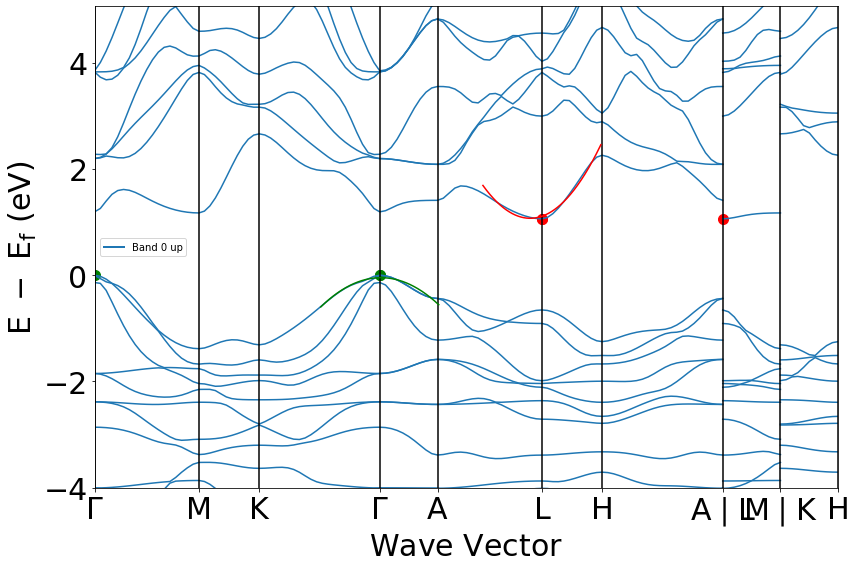

In [348]:
#on calcul les parabole autour des points
abs_val = linspace(sommetx-0.5,sommetx+0.5,1000)
abs_cond = linspace(basex-0.5,basex+0.5,1000)
para_val = valence[0]*abs_val**2+valence[1]*abs_val+valence[2]
para_cond = conduction[0]*abs_cond**2+conduction[1]*abs_cond+conduction[2]
#on les affiche
plotter.get_plot(vbm_cbm_marker=True)
plt.plot(abs_val,para_val,'g')
plt.plot(abs_cond,para_cond,'r')
display()

On peut voir sur le graphe que la parabole reste une bonne approximation des bandes, bien que l'on voit pour la base de la bande de conduction que cette approximation peut présenter des faiblesses.  